# Computational Drug Discovery Machine_Learning [Part 4] - Building a Regression Model

In this Part 4, we will be building a simple ML regression model for the pfHT1 inhibitors using the random forest algorithm

## Import libraries

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load the dataset

In [3]:
df = pd.read_csv('pfHT1_bioactivity_data_pIC50_pubchem_fingerprints.csv')

In [4]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.945578
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819
788,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819
789,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819
790,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819


## Specify the features for the model

### Input Features

The input features will be the pubchem fingerprints

In [5]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
788,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
789,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
790,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Output Features

The output variable will be the pIC50 values

In [6]:
Y = df['pIC50']
Y

0      4.920819
1      4.920819
2      4.920819
3      4.945578
4      4.920819
         ...   
787    4.920819
788    4.920819
789    4.920819
790    4.920819
791    5.311580
Name: pIC50, Length: 792, dtype: float64

### Let's just see the dimensions of the X and Y variables

In [7]:
X.shape

(792, 881)

In [8]:
Y.shape

(792,)

### Remove the Low Variance Features

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1-.8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(792, 166)

### Data splitting

We'll use an 80/20 ratio

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((633, 166), (633,))

In [12]:
X_test.shape, Y_test.shape

((159, 166), (159,))

## Build a Regression Model

In [18]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.17460011358585414

Remember R2 is a measure of how strongly 2 variables are correlated. The higher the R2 score, the greater the correlation

In [14]:
Y_pred = model.predict(X_test)
Y_pred.shape

(159,)

## Scatter plot of Predicted pIC50s vs Experimental pIC50s

/home/wachirah/miniconda3/envs/my_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


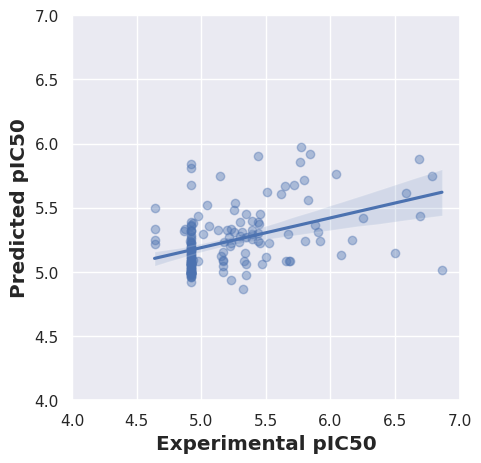

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style('darkgrid')

ax = sns.regplot(Y_test, Y_pred,scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50',fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4,7)
ax.set_ylim(4,7)
ax.figure.set_size_inches(5,5)
plt.show()